# Praktikum 4: Machine Learning

## Aufgabe: Vergleich von Machine Learning Algorithmen für die Bildklassifizierung

**Ziel**: 

Ziel dieses Praktikums ist es, verschiedene Machine Learning Methoden zur Klassifikation von handgeschriebenen Ziffern (MNIST-Datensatz) zu erkunden und zu vergleichen. Durch diese Aufgabe sollt ihr ein tieferes Verständnis für die Stärken, Schwächen und Anwendungsgebiete verschiedener Machine Learning Algorithmen erlangen.

**Einführung**:

Der MNIST-Datensatz ist eine Sammlung von handgeschriebenen Ziffern, der häufig zum Einstieg in die Bilderkennung und Machine Learning genutzt wird. Er besteht aus 70.000 Bildern, wobei jedes Bild eine der Ziffern von 0 bis 9 darstellt. Diese Aufgabe bietet eine praktische Gelegenheit, grundlegende Techniken des Machine Learnings anzuwenden und zu vergleichen.
 
<img src="digits_output.png" alt="image" width="300" height="auto">

**Aufgabenübersicht**:

1. **Datenvorverarbeitung**:
    - Ladet die erste Version des MNIST-Datensatzes über scikit-learn.
    - Teilt den Datensatz in Trainings- und Testsets auf. Das Testset soll 20 % der Daten beinhalten.
    - Da es sich bei den Bildern um 28 x 28 Matrizen handelt, die ML Algorithmen jedoch Vektoren als Input erwarten, müsst ihr die Daten entsprechend umformen. Nutzt dafür die Funktion `reshape()`.
    - Skaliert die Daten auf den Wertebereich [0, 1]. Nutzt dafür den `MinMaxScaler` von scikit-learn.

2. **Klassifikation mit verschiedenen Algorithmen**:
    - Trainiert die folgenden Algorithmen:
        - Logistic Regression (mit `sklearn`)
        - Decision Tree (mit`sklearn`)
        - Random Forest (mit `sklearn`)
        - Support Vector Machine (mit `sklearn`)
        - Neural Network (mit `tensorflow.keras` und dem `Sequential`-Package):
            - Verwendet mindestens 2 Hidden Layers (Dense).
            - Nutzt die Loss Function `Crossentropy` (Achtung: Es gibt verschiedene Arten! Informiert euch darüber).
            - Verwendet die Aktivierungsfunktionen `relu` und `softmax` (Achtet darauf, welche für welche Layer geeignet sind).
            - Trainiert das Netz für 10 Epochen.
            - Nutzt die Funktion `summary()` um euch die Netzarchitektur ausgeben zu lassen.
    - Achtet auf eine sinnvolle Wahl der Hyperparameter. Informiert euch bei Bedarf auf den jeweiligen Dokumentationsseiten der Bibliotheken.
    - Evaluiert jedes Modell mit der Metrik `accuracy_score` auf dem Testset (Achtung: Das Vorgehen zur Evaluierung des Neural Networks ist etwas anders!).
    - Messt die Trainings- und Inferenzzeiten für die verschiedenen Algorithmen mit der Funktion `time()`.

3. **Evaluierung und Vergleich**:
    - Vergleicht die Leistung der Modelle in einer Pandas-Tabelle hinsichtlich Trainingszeit und Genauigkeit.
    - Beschreibt die Ergebnisse kurz in etwa 5 Sätzen.

## Datenvorverarbeitung

### Daten laden

Ladet die erste Version des MNIST-Datensatzes über scikit-learn.

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# MNIST DataSet laden
mnist = fetch_openml('mnist_784')

In [3]:
# Informationen über das MNIST DataSet

#mnist.values()
print(mnist.data.shape)
#print(mnist.target.shape)
#print(mnist.data.head())
#print(mnist.target.head())
print(mnist.DESCR)
#print(mnist.details)

(70000, 784)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 

In [4]:
# Extrahieren der Daten und Labels und konvertieren in gewünschte Formate
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

### Train-Test-Split

Teilt den Datensatz in Trainings- und Testsets auf. Nutzt die Funktion `train_test_split()` von scikit-learn. Das Testset soll 20 % der Daten beinhalten.

In [5]:
# DataSet in Trainings- und Testdaten splitten im Verhältnis 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
print("Shape der Trainingsdaten:", X_train.shape)
print("Shape der Testdaten:", X_test.shape)
print("Shape der Labels (Training):", y_train.shape)
print("Shape der Labels (Test):", y_test.shape)

Shape der Trainingsdaten: (56000, 784)
Shape der Testdaten: (14000, 784)
Shape der Labels (Training): (56000,)
Shape der Labels (Test): (14000,)


### Umwandlung in Vektoren

Da es sich bei den Bildern um 28 x 28 Matrizen handelt, die ML Algorithmen jedoch Vektoren als Input erwarten, müsst ihr die Daten entsprechend umformen. Nutzt dafür die Funktion `reshape()`.


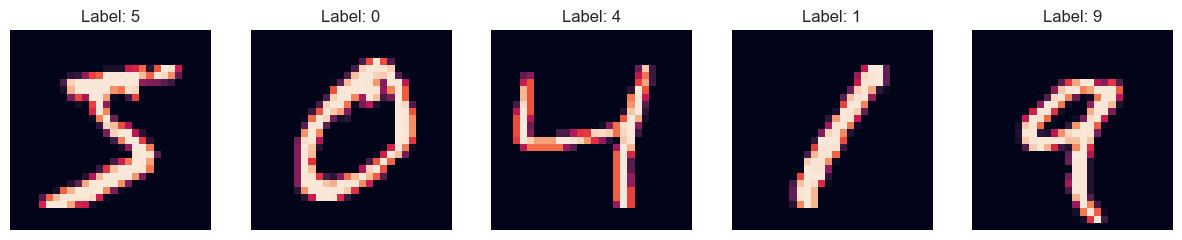

In [7]:
# Die Bilder liegen bereits als Vektoren vor.
# Sie müssen nur zum Anzeigen in 28x28 Matrix umgewandelt werden.
num = 5

plt.figure(figsize=(15, 20))
for i in range(num):
    img = X.iloc[i].values.reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

In [8]:
print(X.shape[1])
print(X_train.shape[1])
print(X_test.shape[1])

784
784
784


### Skalierung

Skaliert die Daten auf den Wertebereich [0, 1]. Nutzt dafür den `MinMaxScaler` von scikit-learn.

In [9]:
# Skalieren der Daten auf den Wertebereich [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Klassifikation mit verschiedenen Algorithmen
   - Trainiert die folgenden Algorithmen:
        - Logistic Regression (mit `sklearn`)
        - Decision Tree (mit`sklearn`)
        - Random Forest (mit `sklearn`)
        - Support Vector Machine (mit `sklearn`)
        - Neural Network (mit `tensorflow.keras` und dem `Sequential`-Package):
            - Verwendet mindestens 2 Hidden Layers (Dense).
            - Nutzt die Loss Function `Crossentropy` (Achtung: Es gibt verschiedene Arten! Informiert euch darüber).
            - Verwendet die Aktivierungsfunktionen `relu` und `softmax` (Achtet darauf, welche für welche Layer geeignet sind).
            - Trainiert das Netz für 10 Epochen.
            - Nutzt die Funktion `summary()` um euch die Netzarchitektur ausgeben zu lassen.
   - Achtet auf eine sinnvolle Wahl der Hyperparameter. Informiert euch bei Bedarf auf den jeweiligen Dokumentationsseiten der Bibliotheken.
   - Messt die Trainings- und Inferenzzeiten für die verschiedenen Algorithmen mit der Funktion `time()`.
   - Evaluiert jedes Modell mit der Metrik `accuracy_score` auf dem Testset (Achtung: Das Vorgehen zur Evaluierung des Neural Networks ist etwas anders!).

### Logistic Regression

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Intercept**: Das Intercept (oder Bias) ist ein Array mit den Abfangwerten für die verschiedenen Klassen. Es verschiebt die Entscheidungsgrenze.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.
- **C**: Invers der Regularisierungsstärke; ein kleinerer Wert bedeutet stärkere Regularisierung.
- **N Jobs**: Anzahl der CPUs, die verwendet werden sollen. `None` bedeutet 1 CPU.
- **Dual**: Gibt an, ob das duale oder das primale Optimierungsproblem gelöst wird. Nur für `liblinear`-Solver relevant.
- **Fit intercept**: Ob ein Intercept in das Modell eingebaut wird.
- **Intercept Scaling**: Skalierung des Intercepts, nur relevant wenn `fit_intercept` und `solver='liblinear'`.
- **L1 Ratio**: Verhältnis von L1- und L2-Regularisierung; nur bei `ElasticNet` relevant.
- **Max Iter**: Maximale Anzahl der Iterationen bei der Optimierung.
- **N Iter**: Anzahl der Iterationen, die der Solver benötigt hat, um zu konvergieren.
- **Penalty**: Die Norm der Regularisierung (`'l2'`, `'l1'`, `'elasticnet'` oder `'none'`).
- **Solver**: Der Algorithmus, der zur Optimierung verwendet wird. Verschiedene Solver haben unterschiedliche Eigenschaften und Anforderungen.
- **Tol**: Toleranz für das Abbruchkriterium.
- **Verbose**: Gibt an, ob während der Ausführung des Solvers Informationen ausgegeben werden.
- **Warm Start**: Wenn `True`, werden die Ergebnisse der vorherigen Aufrufe von `fit` verwendet, um das Modell zu initialisieren.
- **Coef**: Die gelernten Koeffizienten für das Modell, ein Array der Form (n_classes, n_features). Diese Koeffizienten bestimmen die Entscheidungsgrenzen.


In [10]:
from sklearn.linear_model import LogisticRegression

# Trainieren des Modells
clf_lr = LogisticRegression(max_iter=1000, random_state=0)
clf_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [11]:
from sklearn.metrics import accuracy_score

# Evaluieren des Modells
y_pred = clf_lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   {accuracy:.4f}
Intercept:                  {clf_lr.intercept_}
Class Weight:               {clf_lr.class_weight}
Classes:                    {clf_lr.classes_}
Random State:               {clf_lr.random_state}
C:                          {clf_lr.C}
N Jobs:                     {clf_lr.n_jobs}
Dual:                       {clf_lr.dual}
Fit intercept:              {clf_lr.fit_intercept}
Intercept Scaling:          {clf_lr.intercept_scaling}
L1 Ratio:                   {clf_lr.l1_ratio}
Max Iter:                   {clf_lr.max_iter}
N Iter:                     {clf_lr.n_iter_}
Penalty:                    {clf_lr.penalty}
Solver:                     {clf_lr.solver}
Tol:                        {clf_lr.tol}
Verbose:                    {clf_lr.verbose}
Warm Start:                 {clf_lr.warm_start}
Coef:                       {clf_lr.coef_}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   0.9176
Intercept:                  [-1.14023644  1.51324601  0.18178715 -0.91429774  0.15114695  2.0304898
 -0.35311116  1.44370957 -2.41653289 -0.49620124]
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Random State:               0
C:                          1.0
N Jobs:                     None
Dual:                       False
Fit intercept:              True
Intercept Scaling:          1
L1 Ratio:                   None
Max Iter:                   1000
N Iter:                     [237]
Penalty:                    l2
Solver:                     lbfgs
Tol:                        0.0001
Verbose:                    0
Warm Start:                 False
Coef:                       [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

### Decision Tree

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Criterion**: Das Kriterium, das verwendet wird, um die Qualität eines Splits zu messen (z. B. `gini` oder `entropy`).
- **Tree**: Das zugrundeliegende Baumobjekt, das die Baumstruktur des Modells speichert.
- **CCP Alpha**: Der Komplexität-Parameter (Cost-Complexity Pruning Alpha) zur Minimal-Reduktion der Komplexität des Baums.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Max Depth**: Die maximale Tiefe des Baumes. `None` bedeutet, dass der Baum so lange wächst, bis alle Blätter rein sind oder weniger als `min_samples_split` Samples enthalten.
- **Max Features**: Die maximale Anzahl von Features, die für die besten Splits berücksichtigt werden. `None` bedeutet, dass alle Features verwendet werden.
- **Max Leaf Nodes**: Die maximale Anzahl der Blätter. `None` bedeutet, dass unbegrenzt viele Blätter erzeugt werden können.
- **Min Samples Leaf**: Die minimale Anzahl von Samples, die in einem Blatt-Knoten vorhanden sein müssen.
- **Min Samples Split**: Die minimale Anzahl von Samples, die benötigt werden, um einen internen Knoten zu splitten.
- **Min Impurity Decrease**: Die minimale Verringerung der Ungleichheit, die ein Split verursachen muss, um als solcher akzeptiert zu werden.
- **Splitter**: Die Strategie, die verwendet wird, um den Split an jeder Knotenstelle zu wählen. Mögliche Werte sind `best` oder `random`.
- **Monotonic cst**: Einschränkungen für die Monotonie, die das Wachstum des Baumes steuern.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Trainieren des Modells
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_scaled, y_train)
cross_val_score(clf_dt, X_train_scaled, y_train, cv=10)

array([0.87107143, 0.86482143, 0.86178571, 0.86625   , 0.87660714,
       0.86089286, 0.87357143, 0.87214286, 0.87142857, 0.87017857])

In [13]:
# Evaluieren des Modells
y_pred_dt = clf_dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   {accuracy_dt:.4f}
Criterion:                  {clf_dt.criterion}
Tree:                       {clf_dt.tree_}
CCP Alpha:                  {clf_dt.ccp_alpha}
Class Weight:               {clf_dt.class_weight}
Classes:                    {clf_dt.classes_}
Max Depth:                  {clf_dt.max_depth}
Max Features:               {clf_dt.max_features}
Max Leaf Nodes:             {clf_dt.max_leaf_nodes}
Min Samples Leaf:           {clf_dt.min_samples_leaf}
Min Samples Split:          {clf_dt.min_samples_split}
Min Impurity Decrease:      {clf_dt.min_impurity_decrease}
Splitter:                   {clf_dt.splitter}
Monotonic cst:              {clf_dt.monotonic_cst}
Random State:               {clf_dt.random_state}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   0.8680
Criterion:                  gini
Tree:                       <sklearn.tree._tree.Tree object at 0x000002AAA0CCEC60>
CCP Alpha:                  0.0
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Max Depth:                  None
Max Features:               None
Max Leaf Nodes:             None
Min Samples Leaf:           1
Min Samples Split:          2
Min Impurity Decrease:      0.0
Splitter:                   best
Monotonic cst:              None
Random State:               0


### Random Forest

- **Accuracy**: Die Genauigkeit des Modells auf den Testdaten. Sie gibt an, wie viele der Vorhersagen des Modells korrekt sind.
- **Criterion**: Das Kriterium, das verwendet wird, um die Qualität eines Splits zu messen (z. B. `gini` oder `entropy`).
- **Tree**: Das zugrundeliegende Baumobjekt, das die Baumstruktur des Modells speichert.
- **CCP Alpha**: Der Komplexität-Parameter (Cost-Complexity Pruning Alpha) zur Minimal-Reduktion der Komplexität des Baums.
- **Class Weight**: Gibt an, ob Klassen unterschiedlich gewichtet werden sollen. `None` bedeutet, dass alle Klassen gleich gewichtet werden.
- **Classes**: Eine Liste der Klassenlabels, die das Modell unterscheiden kann.
- **Max Depth**: Die maximale Tiefe des Baumes. `None` bedeutet, dass der Baum so lange wächst, bis alle Blätter rein sind oder weniger als `min_samples_split` Samples enthalten.
- **Max Features**: Die maximale Anzahl von Features, die für die besten Splits berücksichtigt werden. `None` bedeutet, dass alle Features verwendet werden.
- **Max Leaf Nodes**: Die maximale Anzahl der Blätter. `None` bedeutet, dass unbegrenzt viele Blätter erzeugt werden können.
- **Min Samples Leaf**: Die minimale Anzahl von Samples, die in einem Blatt-Knoten vorhanden sein müssen.
- **Min Samples Split**: Die minimale Anzahl von Samples, die benötigt werden, um einen internen Knoten zu splitten.
- **Min Impurity Decrease**: Die minimale Verringerung der Ungleichheit, die ein Split verursachen muss, um als solcher akzeptiert zu werden.
- **Splitter**: Die Strategie, die verwendet wird, um den Split an jeder Knotenstelle zu wählen. Mögliche Werte sind `best` oder `random`.
- **Monotonic cst**: Einschränkungen für die Monotonie, die das Wachstum des Baumes steuern.
- **Random State**: Zufallszustand für Reproduzierbarkeit der Ergebnisse.

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [15]:
y_pred_rf = clf_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"""
Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   {accuracy_rf:.4f}
Criterion:                  {clf_rf.criterion}
CCP Alpha:                  {clf_rf.ccp_alpha}
Class Weight:               {clf_rf.class_weight}
Classes:                    {clf_rf.classes_}
Max Depth:                  {clf_rf.max_depth}
Max Features:               {clf_rf.max_features}
Max Leaf Nodes:             {clf_rf.max_leaf_nodes}
Min Samples Leaf:           {clf_rf.min_samples_leaf}
Min Samples Split:          {clf_rf.min_samples_split}
Min Impurity Decrease:      {clf_rf.min_impurity_decrease}
Monotonic cst:              {clf_rf.monotonic_cst}
Random State:               {clf_rf.random_state}
""")


Modellinformationen:
----------------------------------------------------------------------------------
Accuracy:                   0.6533
Criterion:                  gini
CCP Alpha:                  0.0
Class Weight:               None
Classes:                    [0 1 2 3 4 5 6 7 8 9]
Max Depth:                  2
Max Features:               sqrt
Max Leaf Nodes:             None
Min Samples Leaf:           1
Min Samples Split:          2
Min Impurity Decrease:      0.0
Monotonic cst:              None
Random State:               0


### Support Vector Machine

In [16]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

In [17]:
clf_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_pred_svm = clf_svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

### Neural Network

In [19]:
import tensorflow as tf
from keras.src import Sequential
from keras.src.layers import Dense, Flatten
from keras.src.losses import CategoricalCrossentropy
from keras.src.optimizers import Adam
from keras.src.activations import relu, softmax

In [20]:
# Modell erstellen
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input Layer: Flatten der 28x28 Bilder zu 784-dimensionalen Vektoren
    Dense(128, activation=relu),    # Hidden Layer 1: 128 Neuronen, relu Aktivierungsfunktion
    Dense(64, activation=relu),     # Hidden Layer 2: 64 Neuronen, relu Aktivierungsfunktion
    Dense(10, activation=softmax)   # Output Layer: 10 Neuronen (Anzahl Klassen), softmax Aktivierungsfunktion
])

# Kompilieren des Modells
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Modellzusammenfassung anzeigen
model.summary()

C:\Users\adria\Documents\CODE\DataScience\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Modell trainieren
model.fit(X_train_scaled, tf.keras.utils.to_categorical(y_train, 
                                                        num_classes=10), 
          epochs=10, 
          validation_data=(X_test_scaled, tf.keras.utils.to_categorical(y_test, 
                                                                        num_classes=10)))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 784), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (32, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 784), dtype=float32)
  • training=True
  • mask=None

## Evaluierung und Vergleich
   - Vergleicht die Leistung der Modelle in einer Pandas-Tabelle hinsichtlich Trainingszeit, Inferenzzeit und Test Accuracy.
   - Beschreibt die Ergebnisse kurz in etwa 5 Sätzen.

In [ ]:
# TODO: Hier soll euer Code stehen.